# Introduction
 This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The main qeustion we are trying to answer here is why 30% of patients miss their scheduled appointment. We are trying to predict the most important factors that affect the atendance of the patient.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
# noshowappointments-kagglev2-may-2016
df = pd.read_csv('..\\dataset\\noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Wrangling

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Correct Incosistencies in Data
Below we will correct some of the inconsistencies in the data:

- PatientId is an Integer and AppointmentID is Float , but both don't have any numerical values they should be string but i will igonre them and drop them .
- Data Type of ScheduledDay and AppointmentDay will be changed to DateTime.
- Typo's in the Column names will be corrected
- As the AppointmentDay has 00:00:00 in it's TimeStamp, we will ignore it.
- As we removed the Time from AppointmentDay's TimeStamp we will do a similar thing for ScheduledDay also. (Ideally the Time in AppointmentDay column will help us better rather than in the ScheduledDay)
- there's row with Age = -1 which not make sense .

In [18]:
# change type of PatientId
df.drop(['PatientId','AppointmentID'],axis=1,inplace= True)
# convert ScheduledDay and AppointmentDay into datetime 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 
                        'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [19]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
cols = df.columns 
cat_col = [col for col in cols if col not in ['ScheduledDay','AppointmentDay'] ]
cat_col

['Gender',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow']

In [21]:
for col in  cat_col :
    print("Unique Values in {} : {} ".format(col,df[col].unique()))
    print('-------------------------------------------------------------------------------------------------')

Unique Values in Gender : ['F' 'M'] 
-------------------------------------------------------------------------------------------------
Unique Values in Age : [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1] 
-------------------------------------------------------------------------------------------------
Unique Values in Neighbourhood : ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' '

In [31]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [32]:
df[df['Age']==0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
59,71844284745331,5638545,F,2016-04-29,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,236623344873175,5628286,M,2016-04-27,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,188517384712787,5616082,M,2016-04-25,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,271881817799985,5628321,M,2016-04-27,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,86471282513499,5639264,F,2016-04-29,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,147395196662956,5702537,F,2016-05-16,2016-06-01,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5577525313231,5777724,M,2016-06-06,2016-06-08,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,614245995575,5772400,F,2016-06-03,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,43218463343323,5769545,F,2016-06-03,2016-06-03,0,RESISTÊNCIA,0,0,0,0,0,0,No


- It's seem that the row with Age -1 is wrong and we can remove it 
- 3539 rows with age = 0 seems that it blongs to babies with little months age and we can assume that from rows we can see they don't have any Scholarship or Hypertension or Diabetes or  Alcoholism or Handicap

In [22]:
df = df[df['Age'] >=0]

In [23]:
df["Age_bins"] = pd.qcut(df.Age, 5, labels = ["0 - 12", "13 - 29", "30 - 44", "45 - 58", "59 - 115"])

In [71]:
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [73]:
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.day_name()

In [74]:
df.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Age_bins,WaitingTime,Show,ScheduledDay_DOW,AppointmentDay_DOW
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,45 - 58,35,1,Tuesday,Tuesday
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,45 - 58,35,1,Tuesday,Tuesday
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,13 - 29,41,1,Wednesday,Tuesday
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,30 - 44,41,1,Wednesday,Tuesday
110526,F,2016-04-27,2016-06-07,54,MARIA ORTIZ,0,0,0,0,0,1,No,45 - 58,41,1,Wednesday,Tuesday


# EDA

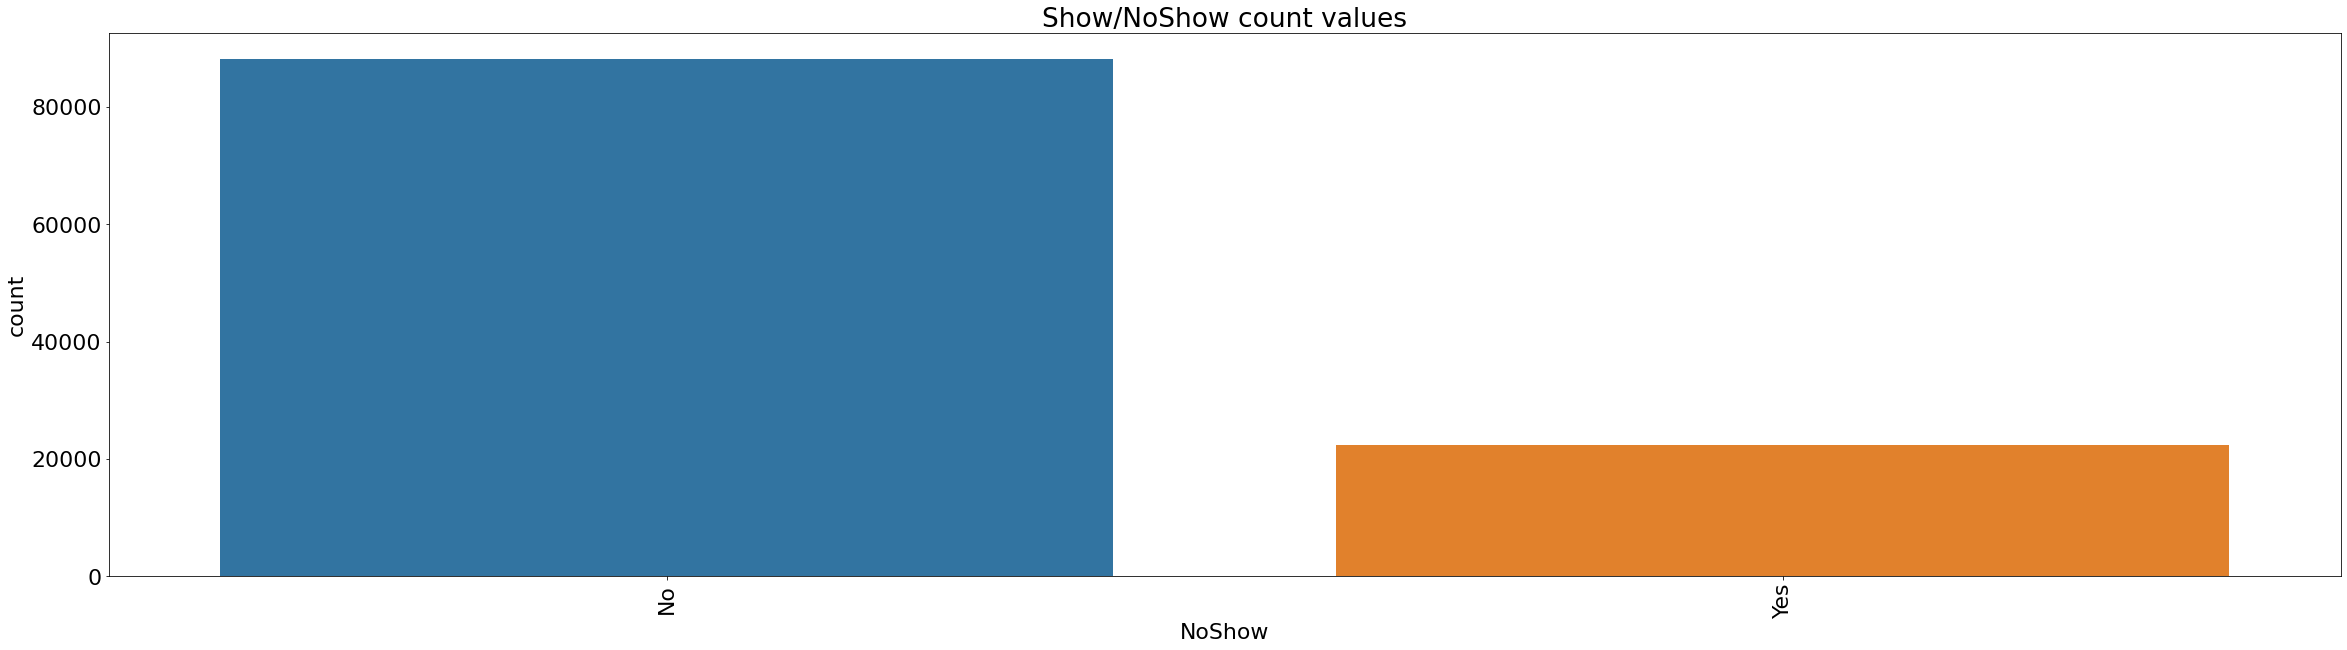

In [26]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
sns.countplot(x=df.NoShow)
plt.title("Show/NoShow count values")
plt.show()

### 1. Does the  Age has an affect  the Appointment  ?

<AxesSubplot:>

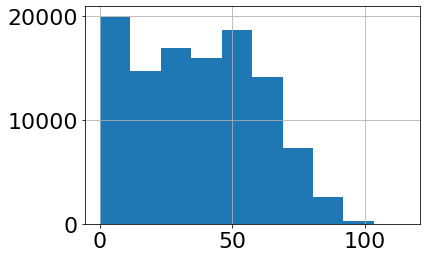

In [28]:
df['Age'].hist()

<AxesSubplot:>

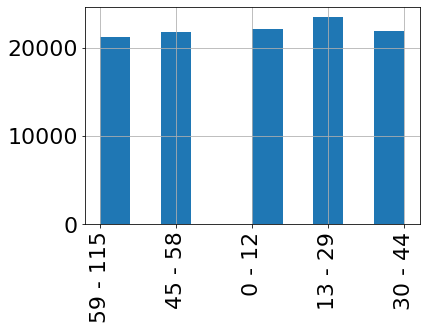

In [30]:
plt.xticks(rotation=90)
df["Age_bins"].hist()

<AxesSubplot:>

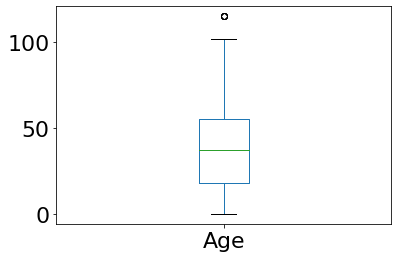

In [31]:
df['Age'].plot(kind='box')

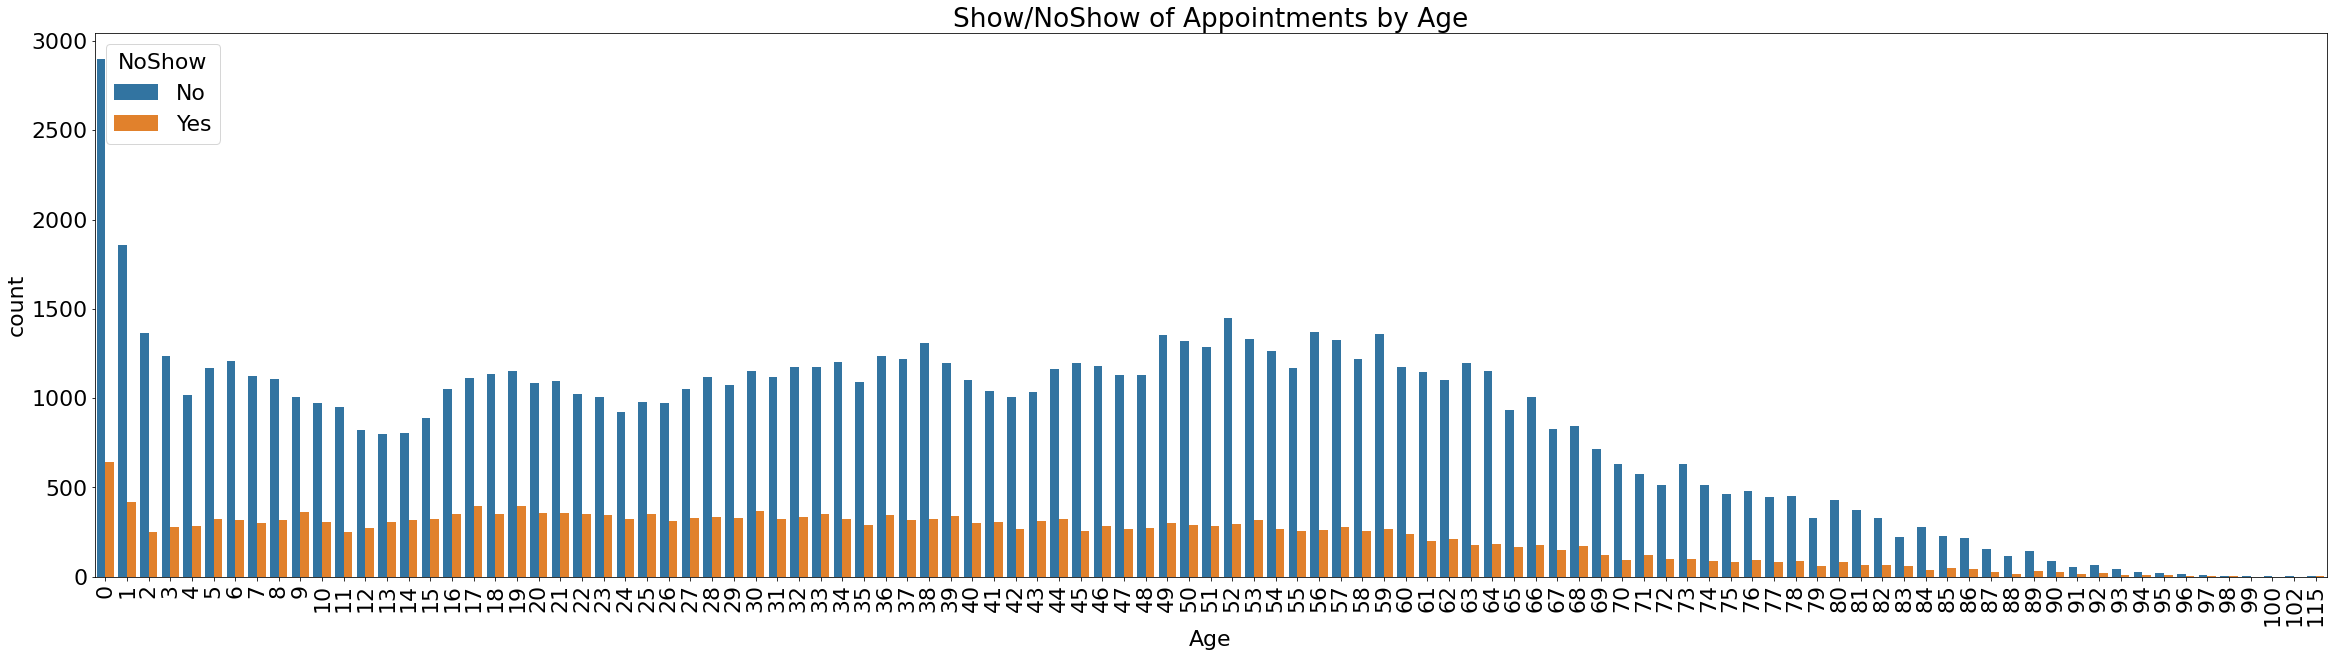

In [32]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
sns.countplot(x=df.Age, hue=df.NoShow)
plt.title("Show/NoShow of Appointments by Age")
plt.show()

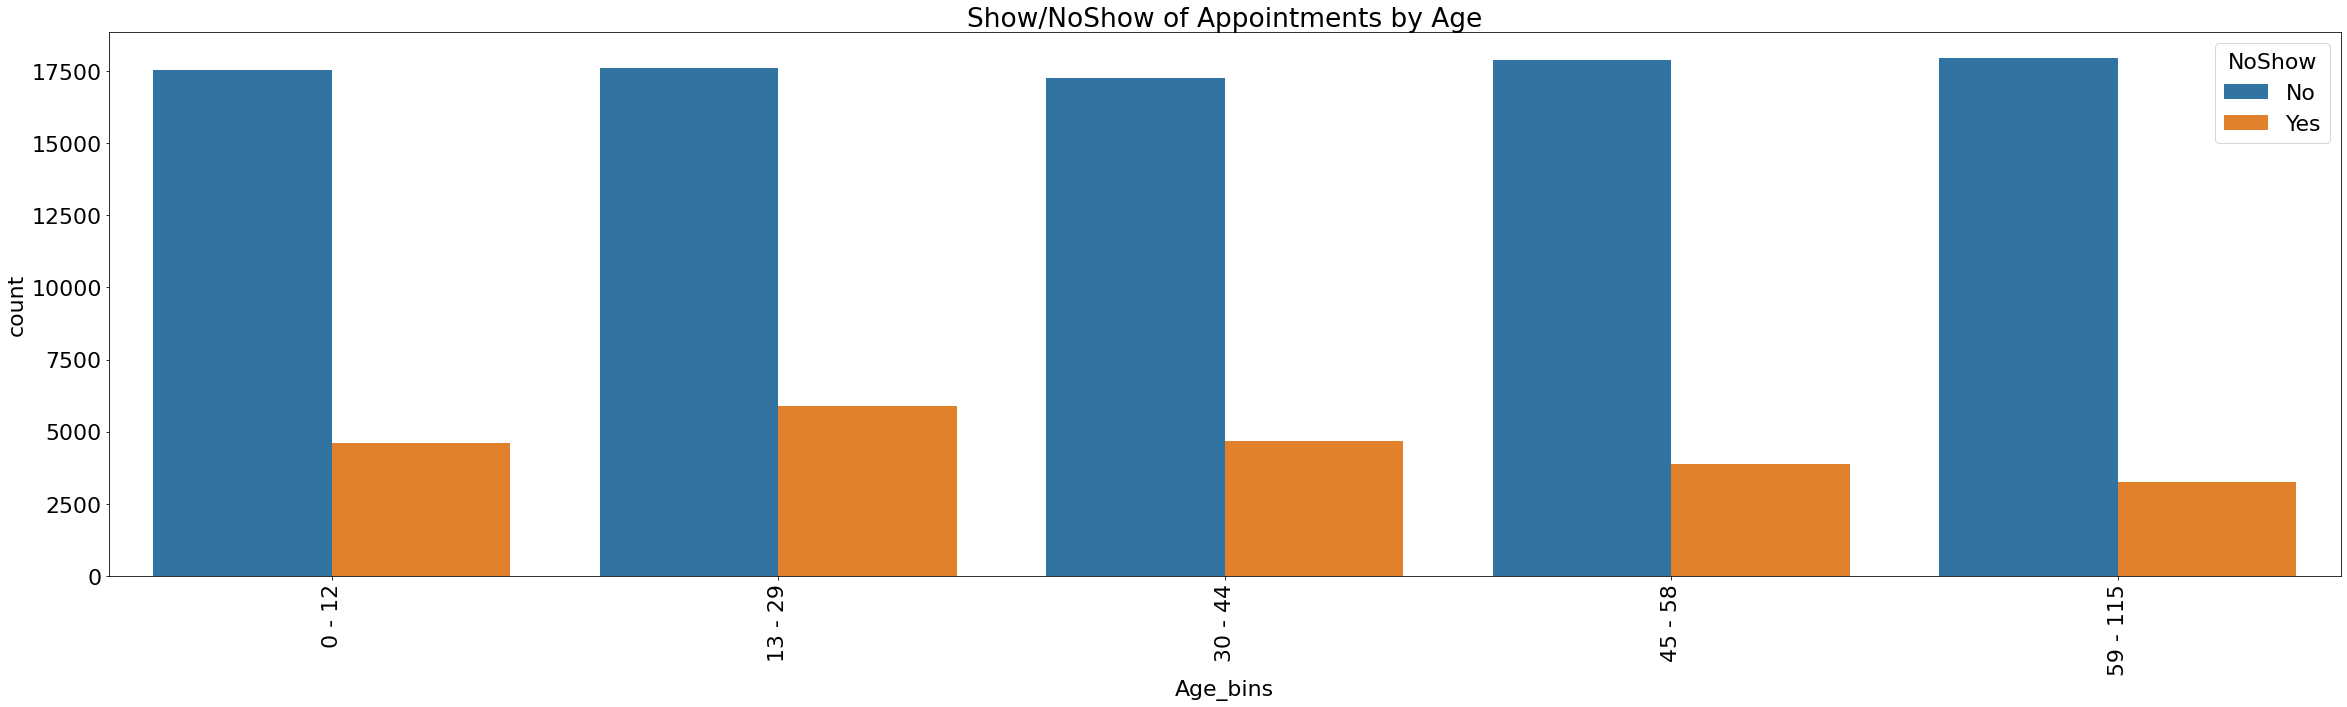

In [33]:
plt.figure(figsize=(40,10))
plt.xticks(rotation=90)
sns.countplot(x=df.Age_bins, hue=df.NoShow)
plt.title("Show/NoShow of Appointments by Age")
plt.show()

- the median is a 37 and the box plot is between 18 to 55 
- age 0 and 1 is the most values in the dataset and they affect on the show that 0 and 1 most of them attend the Appointment but looking to other values we can't say that show affect by age 
- all Age bins almost  have same number of show , bin 13-29 have the greatest number in not attend 

### 2. Does the  gender has an affect  the Appointment  ?

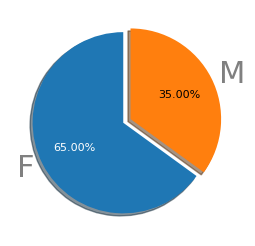

In [34]:
values = df.Gender.value_counts()
labels = df.Gender.value_counts().index 

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

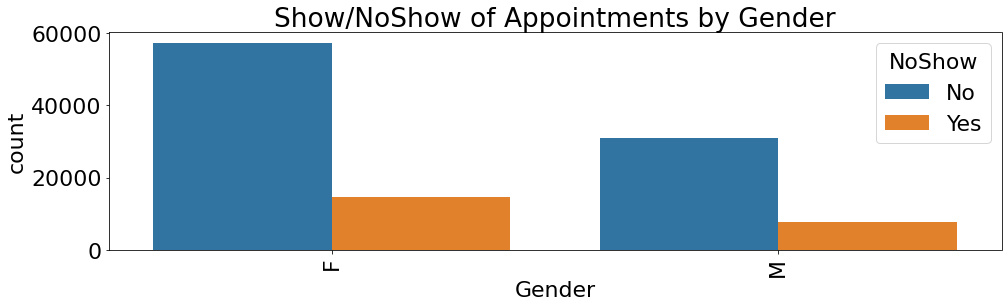

In [35]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.countplot(x=df.Gender, hue=df.NoShow)
plt.title("Show/NoShow of Appointments by Gender")
plt.show()

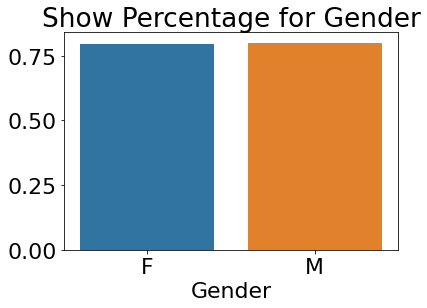

In [36]:
ratio = df[df.NoShow == 'No'].groupby(['Gender']).size()/df.groupby(['Gender']).size()
sns.barplot(x=ratio.index, y=ratio)
plt.title("Show Percentage for Gender")
plt.show()

In [44]:
df["Show"] = df["NoShow"].map( {"No": 1, "Yes":0})
gender_diab_impact = pd.pivot_table(data = df, index = ["Gender", "SMSReceived"], values = "Show")
round(gender_diab_impact * 100, 2) 

Show
Gender SMSReceived       
F      0            83.47
       1            72.23
M      0            82.99
       1            72.84

In [45]:
gender_age_impact = pd.pivot_table(data = df, index = ["Gender", "Age_bins"], values = "Show")
round(gender_age_impact * 100, 2) 

Show
Gender Age_bins       
F      0 - 12    79.05
       13 - 29   75.05
       30 - 44   78.65
       45 - 58   82.00
       59 - 115  84.32
M      0 - 12    79.29
       13 - 29   74.78
       30 - 44   78.57
       45 - 58   82.34
       59 - 115  85.45

 -  Females are the most  appointments in dataset than males 
 - the distrubtion for both F & M vs noshow seem to be the same in the ratio
 - When it comes to show up, there is no Significant difference between males and females regardless of: Agg , Being diabetic or not,Receiving SMS or not
 - but we can say that gender affect the noshow 

### 3. Does the  Scholarship has an affect  the Appointment  ?

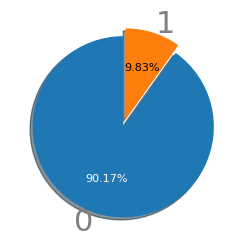

In [46]:
values = df.Scholarship.value_counts()
labels = df.Scholarship.value_counts().index 

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

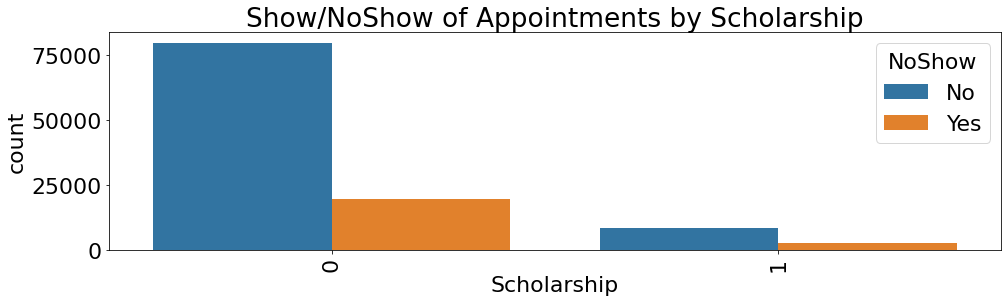

In [47]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.countplot(x=df.Scholarship, hue=df.NoShow)
plt.title("Show/NoShow of Appointments by Scholarship")
plt.show()

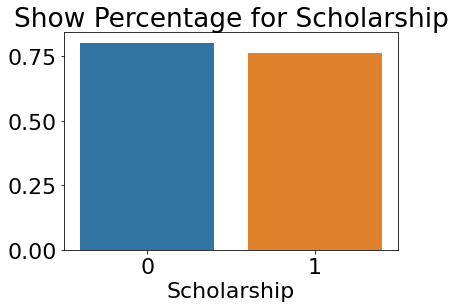

In [48]:
ratio = df[df.NoShow == 'No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
sns.barplot(x=ratio.index, y=ratio)
plt.title("Show Percentage for Scholarship")
plt.show()

In [49]:
Scholarship_age_impact = pd.pivot_table(data = df, index = ["Scholarship", "Age_bins"], values = "Show")
round(Scholarship_age_impact * 100, 2) 

Show
Scholarship Age_bins       
0           0 - 12    79.39
            13 - 29   75.37
            30 - 44   79.05
            45 - 58   82.32
            59 - 115  84.70
1           0 - 12    77.32
            13 - 29   72.21
            30 - 44   76.32
            45 - 58   79.36
            59 - 115  84.12

In [52]:
Scholarship_Diabetes_impact = pd.pivot_table(data = df, index = ["Scholarship", "Diabetes"], values = "Show")
round(Scholarship_Diabetes_impact * 100, 2) 

Show
Scholarship Diabetes       
0           0         80.03
            1         82.28
1           0         76.15
            1         78.38

In [53]:
Scholarship_sms_impact = pd.pivot_table(data = df, index = ["Scholarship", "SMSReceived"], values = "Show")
round(Scholarship_sms_impact * 100, 2) 

Show
Scholarship SMSReceived       
0           0            83.54
            1            73.11
1           0            81.05
            1            66.22

In [54]:
Scholarship_hy_impact = pd.pivot_table(data = df, index = ["Scholarship", "Hypertension"], values = "Show")
round(Scholarship_hy_impact * 100, 2) 

Show
Scholarship Hypertension       
0           0             79.51
            1             82.93
1           0             75.43
            1             80.25

- only 9.8 % have Scholarship and 90.2 don't have 
- most of patients  with no Scholarship attend show almost 75% of them  , so we can't say that Scholarship affect the show 
- But when we investigated it further, we concluded that those who were diabetic or hipertension and received the scholaship had higher show up rates

### 4. Does the  Hypertension has an affect  the Appointment  ?

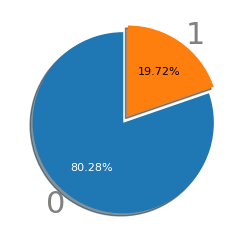

In [55]:
values = df.Hypertension.value_counts()
labels = df.Hypertension.value_counts().index 

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

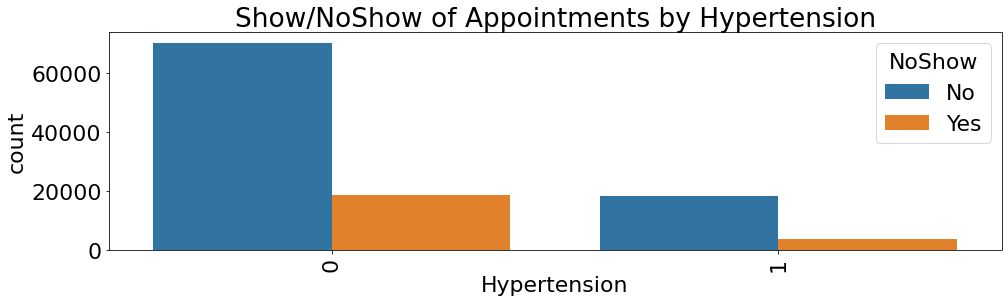

In [56]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.countplot(x=df.Hypertension, hue=df.NoShow)
plt.title("Show/NoShow of Appointments by Hypertension")
plt.show()

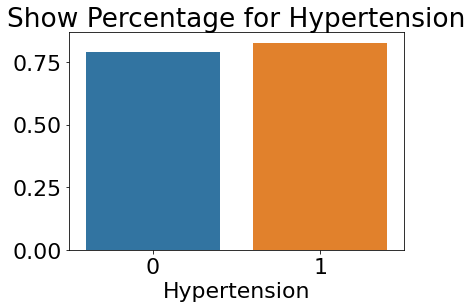

In [57]:
ratio = df[df.NoShow == 'No'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()
sns.barplot(x=ratio.index, y=ratio)
plt.title("Show Percentage for Hypertension")
plt.show()

- From the above visualization we can see that there are around 80% of  patients without Hypertension and out of them around 70000 have come for the visit.
- Out of the 20% of patients with Hypertension and most of them have come for the visit.
- So, Hypertension feature could help us in determining if a patient will turn up for the visit after an appointment.

### 5. Does the  Diabetes has an affect  the Appointment  ?

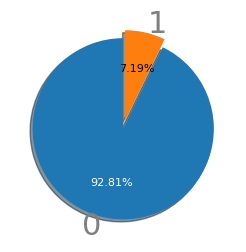

In [58]:
values = df.Diabetes.value_counts()
labels = df.Diabetes.value_counts().index 

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

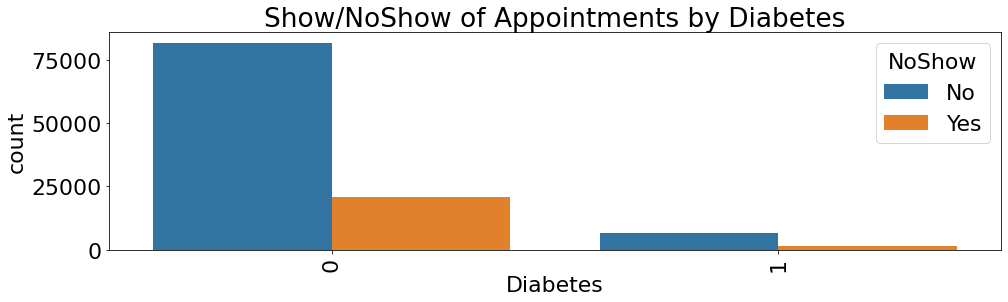

In [59]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.countplot(x=df.Diabetes, hue=df.NoShow)
plt.title("Show/NoShow of Appointments by Diabetes")
plt.show()

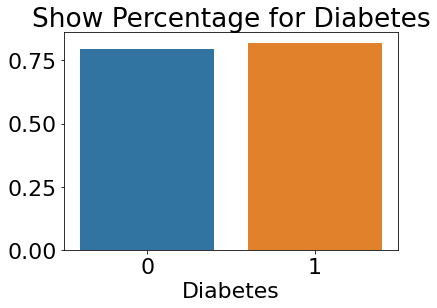

In [60]:
ratio = df[df.NoShow == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
sns.barplot(x=ratio.index, y=ratio)
plt.title("Show Percentage for Diabetes")
plt.show()

- From the above visualization we can see that there are around 92% of  patients without Diabetes and out of them around 80000 have come for the visit.
- Out of the 10% of patients with Diabetes and most of them have come for the visit.
- So, Diabetes feature could help us in determining if a patient will turn up for the visit after an appointment.

### 6. Does the  Alcoholism has an affect  the Appointment  ?

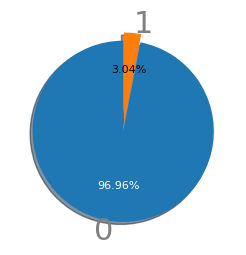

In [61]:
values = df.Alcoholism.value_counts()
labels = df.Alcoholism.value_counts().index 

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

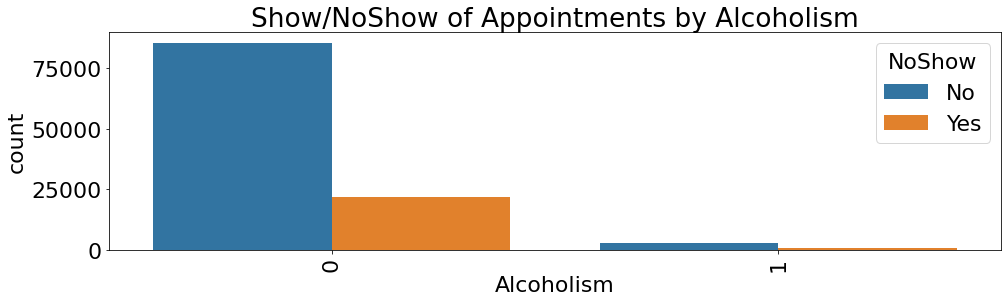

In [62]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.countplot(x=df.Alcoholism, hue=df.NoShow)
plt.title("Show/NoShow of Appointments by Alcoholism")
plt.show()

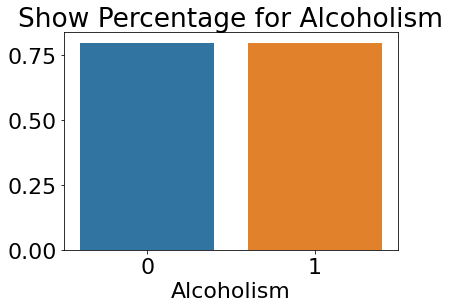

In [63]:
ratio = df[df.NoShow == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()
sns.barplot(x=ratio.index, y=ratio)
plt.title("Show Percentage for Alcoholism")
plt.show()

- From the above visualization we can see that there are around 99% of  patients without Alcoholism and out of them around 80000 have come for the visit.
- Out of the 1% of patients with Alcoholism and most of them have come for the visit.
- As the percentage of visits for patients with and without Alcoholism is the same it may not help us in determining if a patient will come for a visit.

### 7. Does the  Handicap has an affect  the Appointment  ?

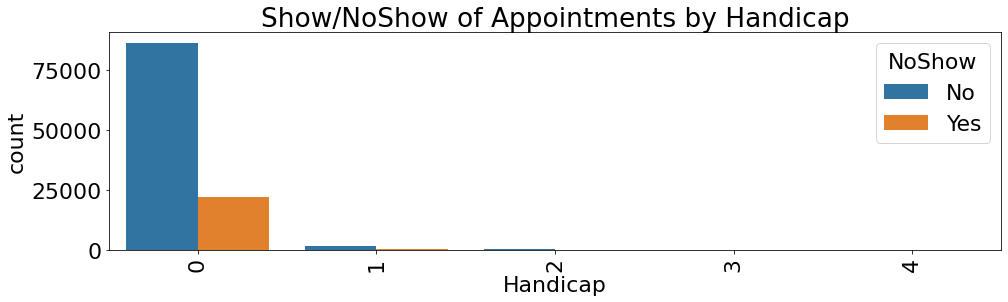

In [65]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sns.countplot(x=df.Handicap, hue=df.NoShow)
plt.title("Show/NoShow of Appointments by Handicap")
plt.show()

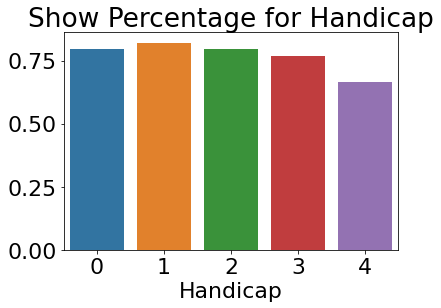

In [66]:
ratio = df[df.NoShow == 'No'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()
sns.barplot(x=ratio.index, y=ratio)
plt.title("Show Percentage for Handicap")
plt.show()

- From the above visualization we can see that there are around 110,000 patients without Handicap and out of them around 80% have come for the visit.
- As we can see a clear distinction between different Handicap levels this feature will help us in determining if a patient will turn up for the visit after taking an appointment.

### 8. Does the  Neighbourhood has an affect  the Appointment  ?

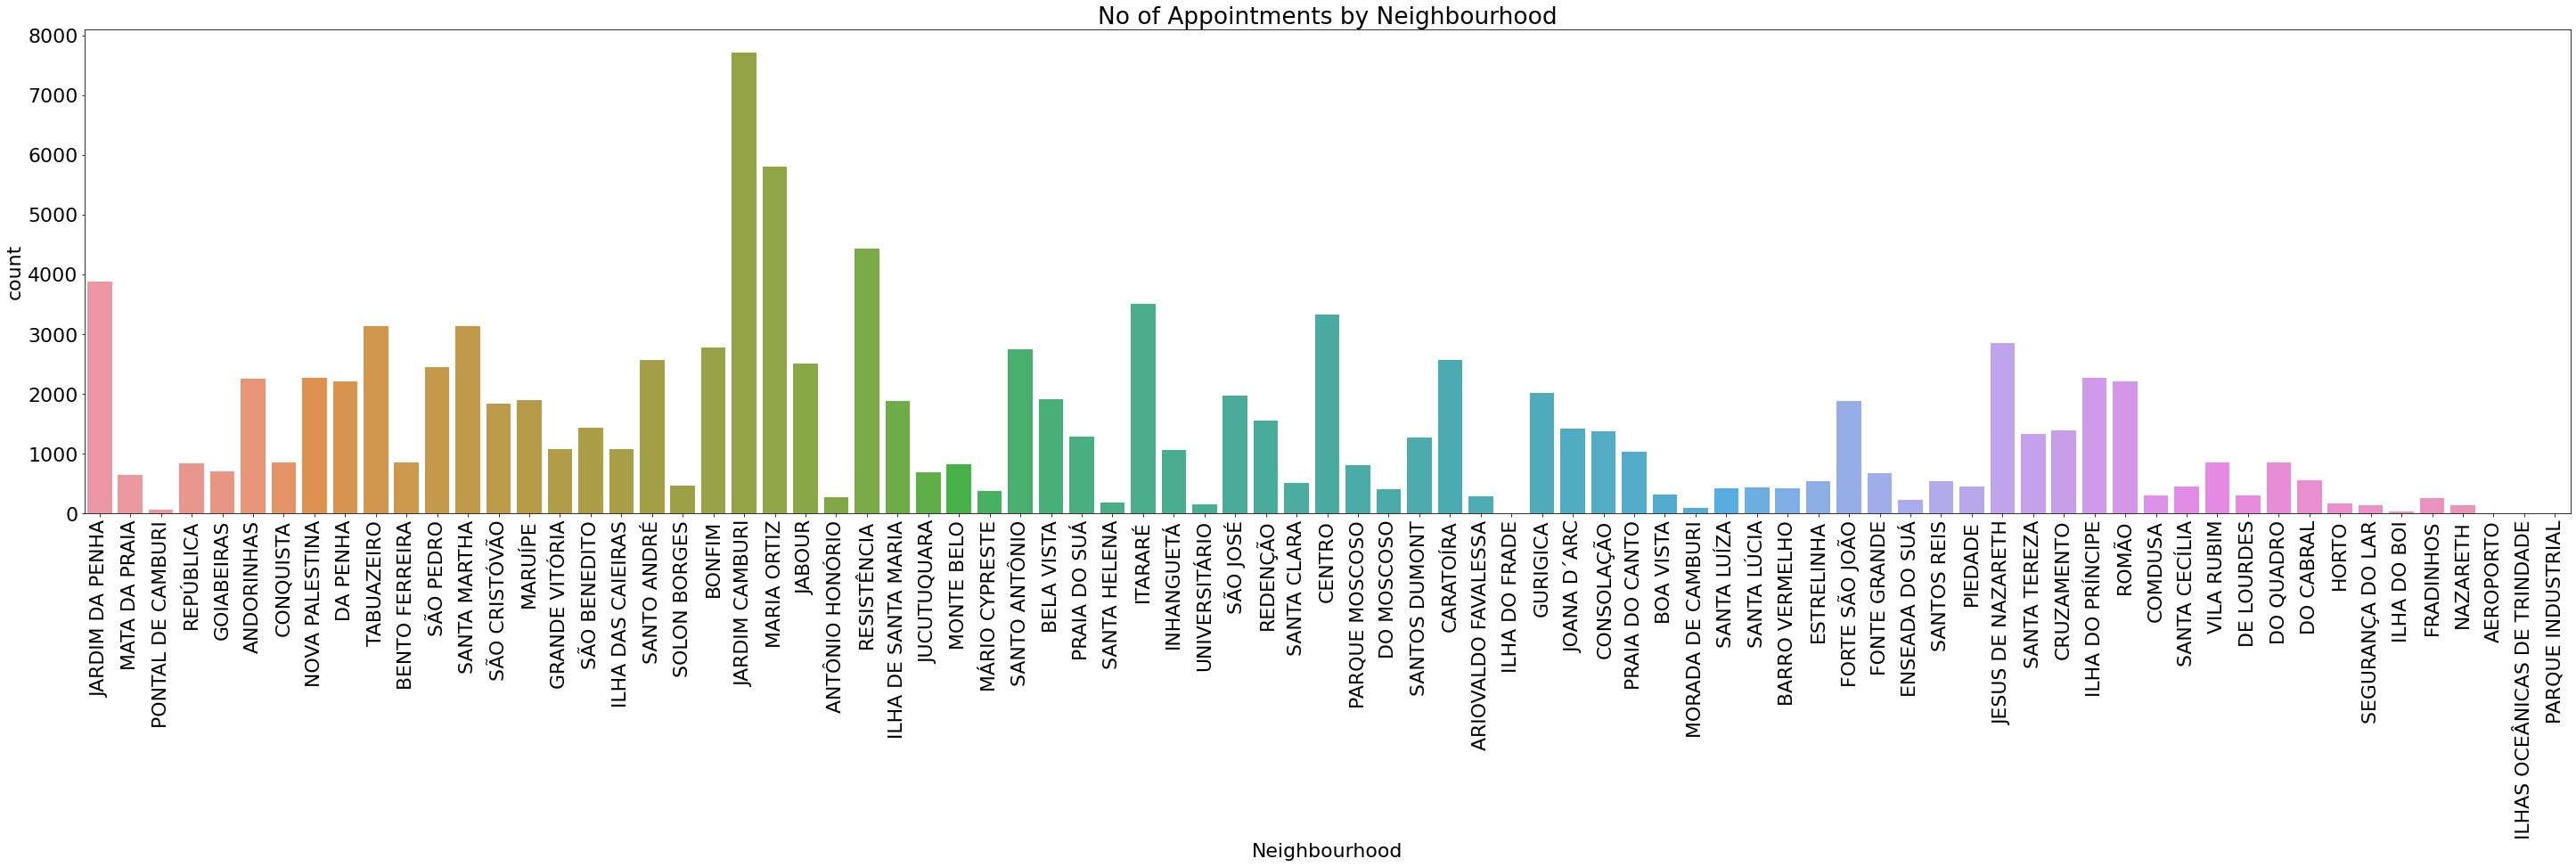

In [68]:
plt.figure(figsize=(50,10))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Neighbourhood)
ax.set_title("No of Appointments by Neighbourhood")
plt.show()

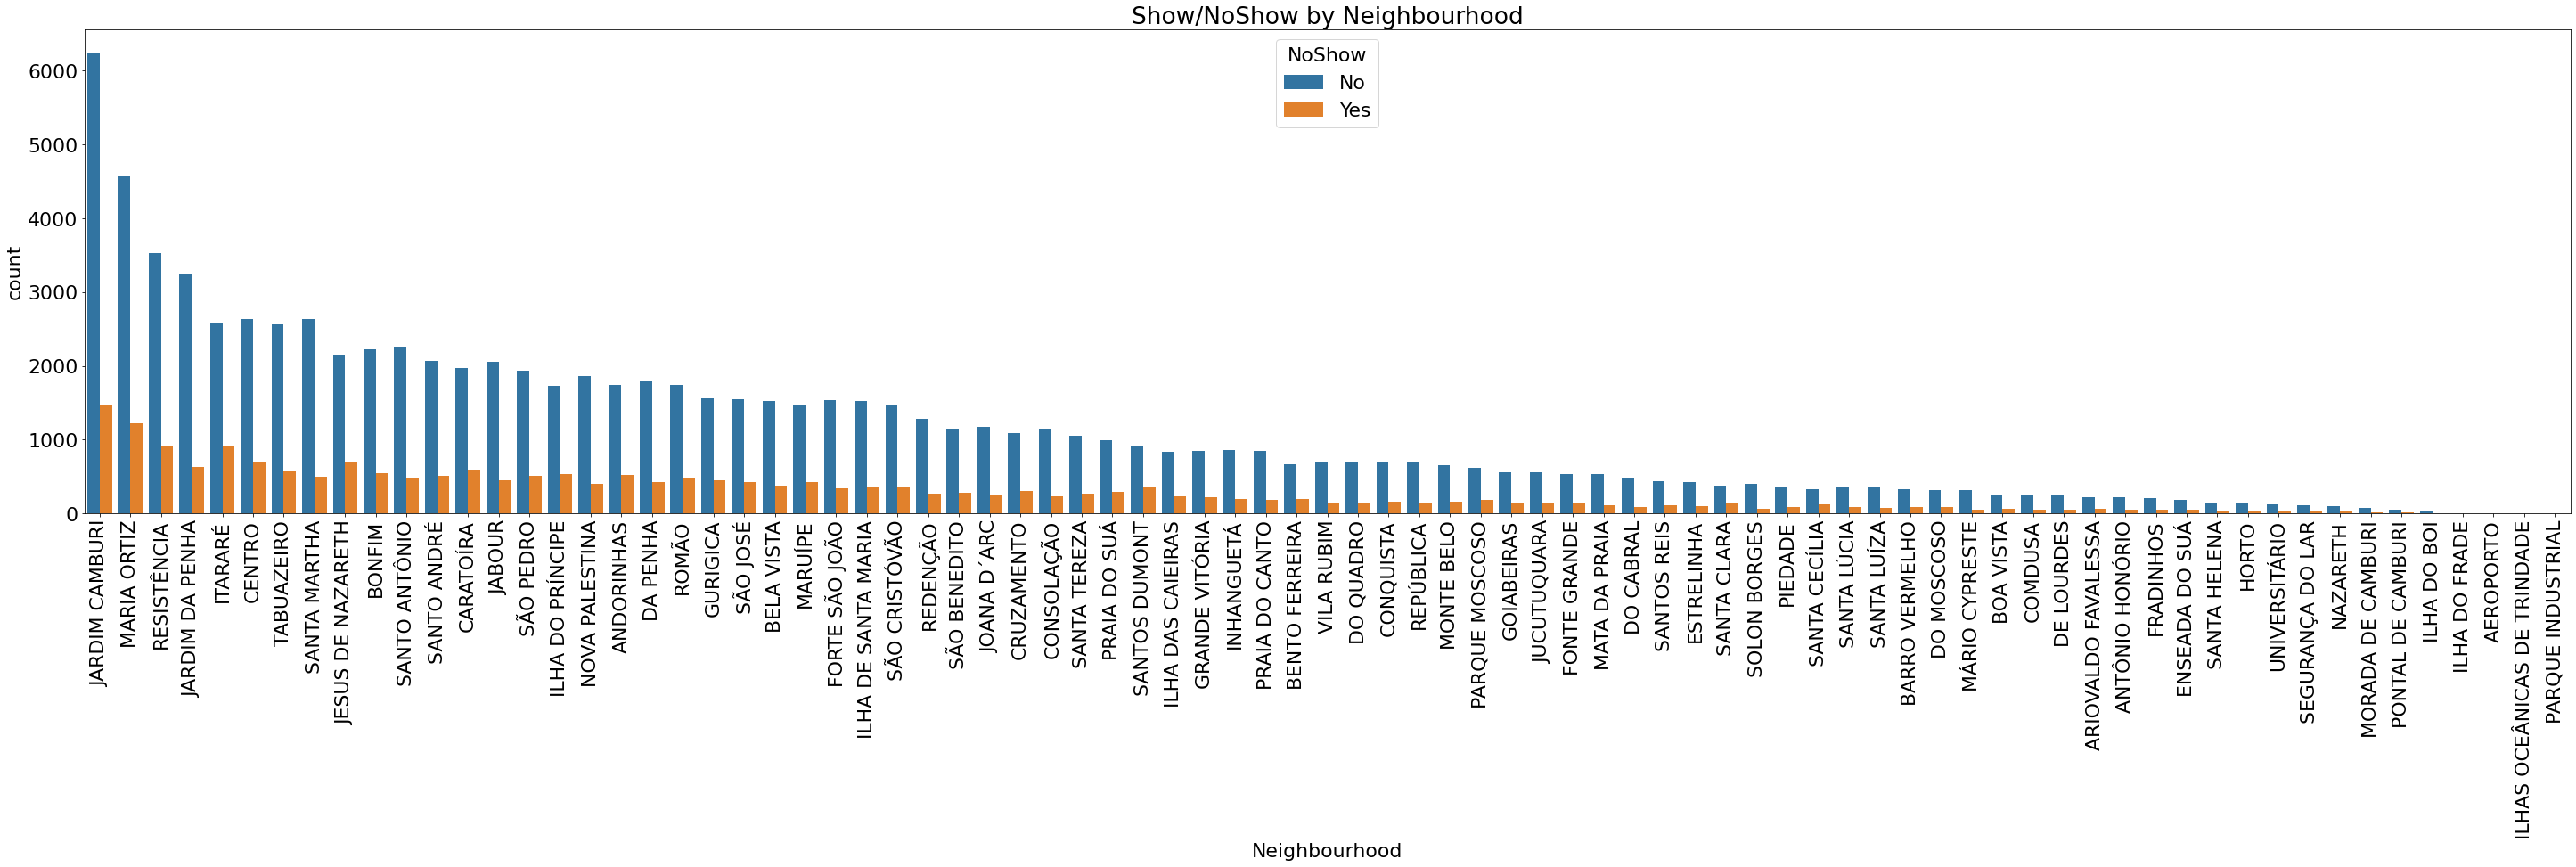

In [69]:
plt.figure(figsize=(50,10))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Neighbourhood, hue=df.NoShow, order=df.Neighbourhood.value_counts().index)
ax.set_title("Show/NoShow by Neighbourhood")
plt.show()

 - From the above visualization looks like the ratio of Show to NoShow is almost the same for all Neighbourhood's
 - We see that some neighborhood have more people show up for their appointment and this indicates that this area have increase in diseases

### 9. Does the  Time  has an affect  the Appointment  ?

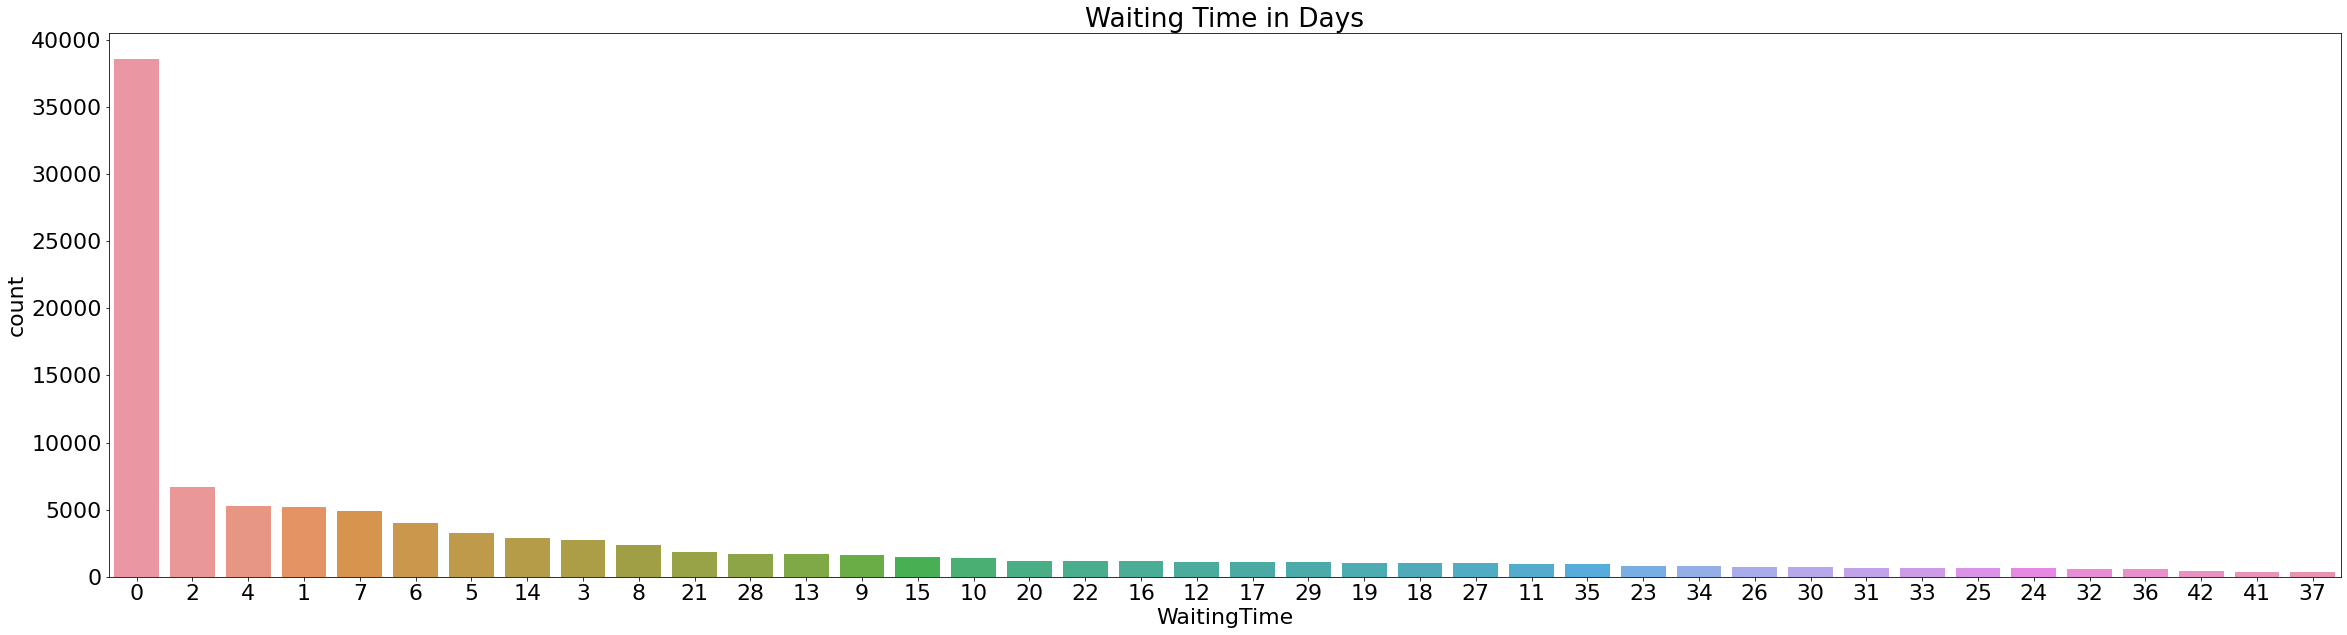

In [70]:
plt.figure(figsize=(40,10))
ax = sns.countplot(x=df.WaitingTime, order=df.WaitingTime.value_counts().iloc[:40].index)
ax.set_title("Waiting Time in Days")
plt.show()

- From the above visualization we can see that most of the patients are booking their appointments on the same day. The next highest waiting times are 2days, 4 days and 1 day.

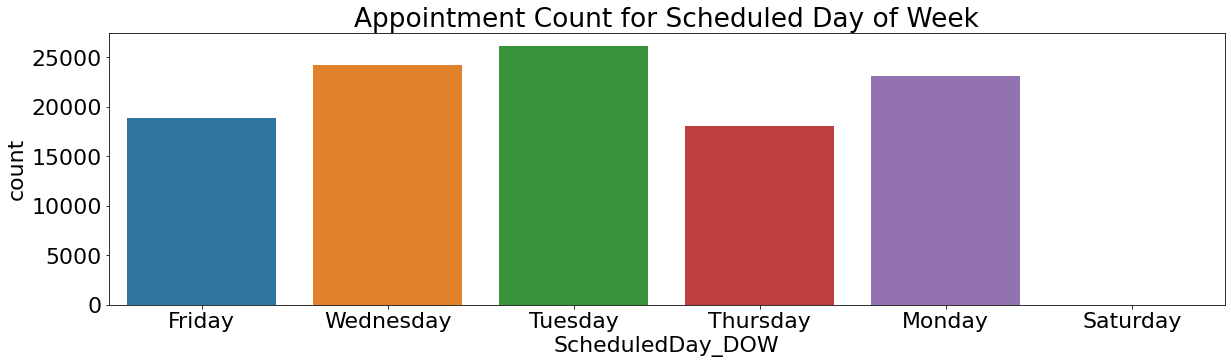

In [75]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df.ScheduledDay_DOW)
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show()

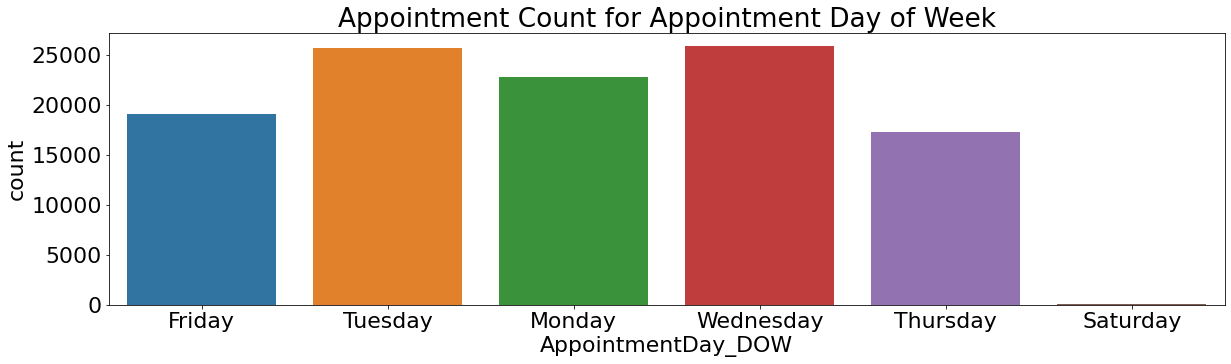

In [77]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df.AppointmentDay_DOW)
ax.set_title("Appointment Count for Appointment Day of Week")
plt.show()

- Looks like  that takes the appointments doesn't work over the weekends as we do not see any appointments taken on Saturday and Sunday.

# Conclusions
Now we can see the factors that affect the absence of the patients more clearly. 
- The gender and age are the most important factor as we saw earlier that female and youth show up for their appointment more than male and old people. 
- Neighbohood and hypertension come after gender and age as there are some neighborhoods that the diseases are spread and patients with hypertension tend to show up if they have it or not. 
- So we need to search for more factors to help patient remmenber their appointments and show up.
- No Limitations in the dataset that null values & missing data and duplicated data are 0  